Goal of this notebook is to apply natural language processing (NLP) on the app names, to predict rating bin.
For inspiration the nlp chapter of the udemy course was used.

In [109]:
import nltk
import os
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [16]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\~LarsSpekscho
[nltk_data]    |     orTrain\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\~LarsSpeks
[nltk_data]    |     choorTrain\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\~LarsSpekscho
[nltk_data]    |     orTrain\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\~LarsSpeksc
[nltk_data]    |     hoorTrain\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\~LarsSpeksc
[nltk_data]    |     hoorTrain\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already 

True

In [17]:
# Data source: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
path = os.getcwd() + "/../data/Google-Playstore-Modified.parquet"
df = pd.read_parquet(path, engine='fastparquet')

In [18]:
#Temporarily add back Rating Bin
df['Rating Bin'] = (df[['Moderate', 'Superb', 'Bad App Yo']]==1).idxmax(1)

In [19]:
df.head()

,App Name,App Id,Rating Count,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Name Length,Size Cat,Time since last update,Days Release to Last Update,log10 Maximum Installs,Moderate,Superb,Bad App Yo,Personal & Social,Entertainment,Development,Rating Bin
0,Ampere Battery Info,com.webserveis.batteryinfo,64,7662,True,0.0,True,False,19,Known,0,350.0,3.884342,0,1,0,0,1,0,Superb
1,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,12,2567,True,0.0,True,False,32,Known,2,4.0,3.409426,0,0,1,0,1,0,Bad App Yo
2,The Everyday Calendar,com.mozaix.simoneboard,39,702,True,0.0,False,False,21,Known,2,0.0,2.846337,1,0,0,0,0,1,Moderate
3,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,820,62433,True,0.0,True,False,32,Known,1,381.0,4.795414,0,0,1,0,0,1,Bad App Yo
4,Dodge The Cars!,com.MrScratchEnterprises.CarDogeGame,55,329,True,0.0,False,False,15,Known,1,0.0,2.517196,0,0,1,1,0,0,Bad App Yo


In [20]:
#Next two lines were moved to feature engineering
#df['App Name'] = df['App Name'].apply(str)
#df['Name Name Length'] = df['App Name'].apply(len)
df = df[['App Name', 'Rating Bin', 'Name Length']]

x_train, x_test, y_train, y_test = train_test_split(df[['App Name', 'Name Length']], df['Rating Bin'], test_size=0.1, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=123)

df_train = pd.concat([x_train, y_train], axis=1)
df_val = pd.concat([x_val, y_val], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

df_train.groupby('Rating Bin').describe()

Name Length                                                   
                 count       mean        std  min   25%   50%   75%   max
Rating Bin                                                               
Bad App Yo    224522.0  22.927989  12.497703  2.0  13.0  20.0  30.0  50.0
Moderate      211815.0  22.287874  12.214851  1.0  12.0  20.0  29.0  50.0
Superb        202693.0  24.272629  12.320773  1.0  14.0  22.0  31.0  50.0

In [21]:
type(y_train)

pandas.core.series.Series

In [22]:
from matplotlib.cm import get_cmap
cmap = get_cmap('tab20c')
palette = {'Bad App Yo':cmap(0), 'Moderate':cmap(16), 'Superb':cmap(4)}

How is the Name Length of app name distributed?

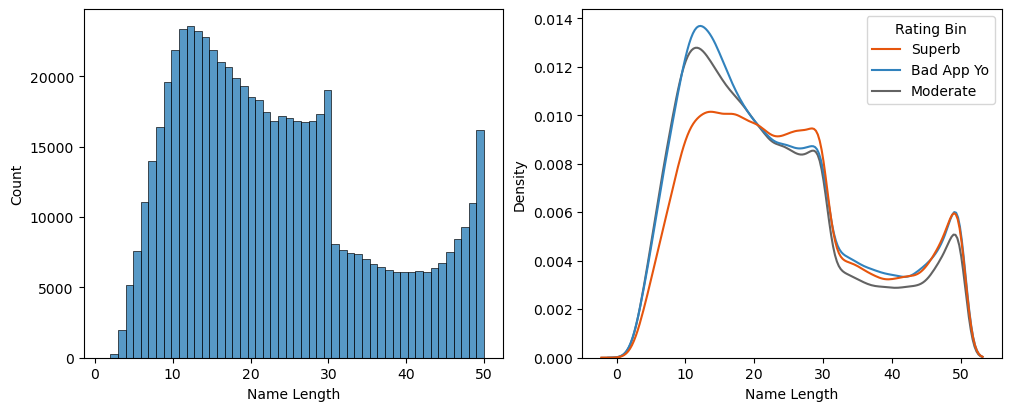

In [23]:
fig, axs = plt.subplots(1,2, figsize=(10, 4), constrained_layout=True)
sns.histplot(x = df_train['Name Length'], bins=50, ax=axs[0])
sns.kdeplot(x = df_train['Name Length'], hue=df_train['Rating Bin'], palette=palette, ax=axs[1])
#From: https://discourse.matplotlib.org/t/how-to-save-subplots-separately/22657/2
fig.savefig(
    "../outputs/figures/Name Length counts all.png",
    # we need a bounding box in inches
    bbox_inches=mtransforms.Bbox(
        # This is in "figure fraction" for the bottom half
        # input in [[xmin, ymin], [xmax, ymax]]
        [[0, 0], [0.5, 1]]
    ).transformed(
        # this take data from figure fraction -> inches
        #    transFigrue goes from figure fraction -> pixels
        #    dpi_scale_trans goes from inches -> pixels
        (fig.transFigure - fig.dpi_scale_trans)
    ),
)
fig.savefig(
    "../outputs/figures/Name Length kde by Rating Bin.png",
    # we need a bounding box in inches
    bbox_inches=mtransforms.Bbox(
        # This is in "figure fraction" for the bottom half
        # input in [[xmin, ymin], [xmax, ymax]]
        [[0.5, 0], [1, 1]]
    ).transformed(
        # this take data from figure fraction -> inches
        #    transFigrue goes from figure fraction -> pixels
        #    dpi_scale_trans goes from inches -> pixels
        (fig.transFigure - fig.dpi_scale_trans)
    ),
)


Is there something off about the longer app names?
Yes, there are many apps with length 30 or 50, because these represent a new and old maximum length set by Google resp.
App names do not appear truncated, suggesting developers are actively trying to fit their name within the limits.

In [24]:
list(df_train[df_train['Name Length'] == 50]['App Name'][:20])

['Lagu BTS Offline Dan Lirik Full Album Terbaru 2021',
 'BeshiDeshi - Market place for Bangladeshi products',
 'Rakesh Yadav Class Notes of Maths in Hindi Offline',
 'Kingdom Battle - Rise of the Mercenary King (Idle)',
 'Simply Minimal HD Watch Face Widget Live Wallpaper',
 'Islamic Color Number by Number Tap.Paint by Number',
 'XenonShop: Create Online Store Free, Business Easy',
 'Racing Car Mission Games 3d Real Simulator Driving',
 '植物 写真 名前 調べる ～図鑑アプリ 観葉植物 サボテンの花 インテリア 多肉 花 ガーデニング～',
 'Sarkari Result - Government Job Alert by Rojgartak',
 'Gujarat RTO Vehicle info -About vehicle owner info',
 'Pakistan Independence Day:14 Aug Flag Photo Editor',
 'Amharic Keyboard -Amharic Language Keyboard Typing',
 'Compare Prize on Swiggy, Zomato(12+)Order Cheaper!',
 'Hoy Madrid - Toda la agenda de Madrid a tu alcance',
 'South African Dating App-African Singles Chat Free',
 'How to create a PayPal Account guide/Ppl A/C guide',
 '10th Class Result 2020 | Check Matric Result Onlin',
 'Eid Muba

In [25]:
print(string.punctuation)
print(stopwords.words('english'))

def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in string.punctuation])
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

df_train['App Name'].head(10).apply(text_process)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only

771498                               [Creativas, Caratulas]
71984         [Savior, Jesus, Christ, Keyboard, Background]
29577                                     [عاملات, بالساعة]
298725      [Account, Class11, Solutions, TS, Grewal, 2019]
246211                                          [Top, Guns]
586638    [Apprison, Digital, Wellbeing, Mobile, Addiction]
188377                           [National, Park, Galicica]
699380                                       [Masjid, near]
42324                           [IC, NOTIFICATION, BLOCKER]
509838                               [GCE, OL, Mathematics]
Name: App Name, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_train['App Name'])

In [27]:
print('Dataframe shape: ', str(df_train.shape))
print('Bow transformer vocabulary length: ', str(len(bow_transformer.vocabulary_)))

Dataframe shape:  (639030, 3)
Bow transformer vocabulary length:  370521


In [28]:
names_bow = bow_transformer.transform(df_train['App Name'])

The code cell to make bar chart of most common words below has disappeared in VS Code :(
It involved extracting the words as an array from the output of CountVectorizer.fit() (which is a 1 by x matrix I believe) and the counts from the .transform output.
Combine these into a dataframe and sort on the counts.

<AxesSubplot: xlabel='Count', ylabel='Word'>

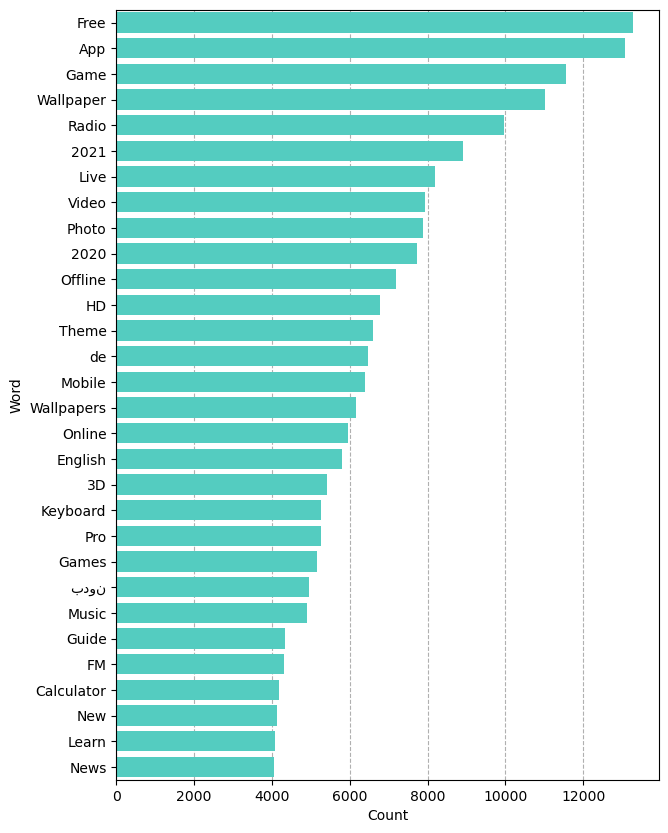

In [107]:

plt.figure(figsize=(7,10))
ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')
ax.set_axisbelow(True)
ax.set(xlabel=None)
sns.barplot(ax=ax, data=sorted_word_count_df.iloc[:30,], x='Count', y='Word', color='turquoise')


In [29]:
print('Shape of Sparse Matrix: ', names_bow.shape)
print('Non-zero occurances: ', names_bow.nnz)

sparsity = (100.0 * names_bow.nnz / (names_bow.shape[0] * names_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

Shape of Sparse Matrix:  (639030, 370521)
Non-zero occurances:  2116889
sparsity: 0.0008940545374022966


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(names_bow)

In [31]:
names_tfidf = tfidf_transformer.transform(names_bow)
print(names_tfidf.shape)

(639030, 370521)


In [110]:
from sklearn.naive_bayes import MultinomialNB
names_model = MultinomialNB().fit(names_tfidf, df_train['Rating Bin'])

In [112]:
train_predictions = names_model.predict(names_tfidf)
#test_predictions = names_model.predict(nam)

from sklearn.metrics import classification_report
print (classification_report(df_train['Rating Bin'], train_predictions))

              precision    recall  f1-score   support

  Bad App Yo       0.74      0.73      0.74    224522
    Moderate       0.69      0.76      0.73    211815
      Superb       0.68      0.61      0.65    202693

    accuracy                           0.71    639030
   macro avg       0.70      0.70      0.70    639030
weighted avg       0.71      0.71      0.70    639030



In [111]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(df_train['App Name'], df_train['Rating Bin'])
predictions = pipeline.predict(df_test['App Name'])

NameError: name 'classification_report' is not defined

In [126]:
print(classification_report(predictions, df_test['Rating Bin']))
print('Accuracy: '+str((predictions == df_test['Rating Bin']).value_counts()[1] / len(predictions)))

              precision    recall  f1-score   support

  Bad App Yo       0.58      0.48      0.53     33206
    Moderate       0.49      0.49      0.49     26137
      Superb       0.33      0.42      0.37     19550

    accuracy                           0.47     78893
   macro avg       0.47      0.46      0.46     78893
weighted avg       0.49      0.47      0.48     78893

Accuracy: 0.4693699060753172


In [72]:
print(df_test['Rating Bin'].value_counts()/len(df_test['Rating Bin']))

Bad App Yo    0.354964
Moderate      0.329083
Superb        0.315953
Name: Rating Bin, dtype: float64
